## Imports

In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [688]:
#  Import data

In [689]:
train_data=pd.read_csv('train.csv')

In [690]:
test=pd.read_csv('test.csv')

## Preprocessing


In [691]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [692]:
train=train_data[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]

In [693]:
data=pd.concat([train,test])
data['Ind']=range(0,2919)
data.set_index('Ind',inplace=True)

In [694]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Ind,,,,,,,,,,,,,,,,,,,,,
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [695]:
data.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Ind,,,,,,,,,,,,,,,,,,,,,
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


###  Missing data handling

In [698]:
miss_cols=[]
miss_dict=dict(data.isnull().sum()>0)
for i in miss_dict :
    if miss_dict[i]:
        miss_cols.append(i)
    

In [699]:
miss_cols

['TotalBsmtSF',
 'GarageCond',
 'BsmtFullBath',
 'MasVnrArea',
 'BsmtQual',
 'GarageArea',
 'Utilities',
 'MiscFeature',
 'Exterior2nd',
 'GarageType',
 'PoolQC',
 'BsmtCond',
 'GarageQual',
 'Electrical',
 'BsmtFinType1',
 'Exterior1st',
 'KitchenQual',
 'GarageCars',
 'BsmtFinSF2',
 'Fence',
 'BsmtExposure',
 'GarageFinish',
 'SaleType',
 'BsmtHalfBath',
 'MasVnrType',
 'GarageYrBlt',
 'BsmtFinSF1',
 'BsmtFinType2',
 'Alley',
 'MSZoning',
 'FireplaceQu',
 'LotFrontage',
 'BsmtUnfSF',
 'Functional']

In [625]:
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(value=data['TotalBsmtSF'].mean(),inplace=True)


In [630]:
miss_cols_h[1]

'GarageCond'

In [631]:
data['GarageCond'].fillna('TA',inplace=True)


In [632]:
miss_cols_h[2]

'MasVnrArea'

In [633]:
data['MasVnrArea'].fillna(0.0,inplace=True)

In [634]:
miss_cols_h[3]

'BsmtQual'

In [635]:
data['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [636]:
data['BsmtQual'].fillna('NA',inplace=True)

In [637]:
miss_cols_h[4]

'GarageArea'

In [646]:
data['GarageArea'].isnull().sum()

1

In [648]:
data['GarageArea'].value_counts().head()

Series([], Name: GarageArea, dtype: int64)

In [649]:
data['GarageArea']=data['GarageArea'].fillna(0.0,inplace=True)

In [650]:
miss_cols_h[5]

'Utilities'

In [651]:
data['Utilities'].isnull().sum()

2

In [652]:
data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [653]:
data['Utilities'].fillna('AllPub',inplace=True)

In [655]:
miss_cols_h[6]

'Exterior2nd'

In [657]:
data['Exterior2nd'].isnull().sum()

1

In [658]:
data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [659]:
data['Exterior2nd']=data['Exterior2nd'].fillna('PreCast',inplace=True)

In [660]:
miss_cols_h[7]

'GarageType'

In [675]:
len(data[data['GarageType'].isnull()]['GarageCars']==0.0) 

157

In [676]:
data['GarageType']=data['GarageType'].fillna('NA',inplace=True)

In [677]:

len(data[data['GarageYrBlt'].isnull()]['GarageCars']==0.0)

159

In [678]:
data['GarageYrBlt']=data['GarageYrBlt'].fillna('Na',inplace=True)

In [679]:
len(data[data['GarageFinish'].isnull()]['GarageCars']==0.0)

159

In [685]:
data['GarageFinish']=data['GarageFinish'].fillna('NA',inplace=True)

In [686]:
data['GarageFinish'].isnull().sum()

2919

In [684]:
data[data['GarageCars'].isnull()]['GarageFinish']

Ind
2576    None
Name: GarageFinish, dtype: object

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


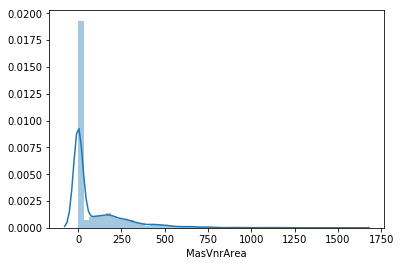

In [572]:
sns.distplot(data['MasVnrArea'])

###  Categorical to Numerical

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 46 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
ExterQual        2919 non-null object
ExterCond        2919 non-null object
Foundation       2919 non-null object
Heating          2919 non-null object
HeatingQC        2919 non-

In [305]:
type(data['YrSold'][0])

numpy.int64

In [306]:
num_cols=[]
for i in data.columns:
    if type(data[i][0])==np.int64:
        num_cols.append(i)
    

In [307]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

In [308]:
def cat_num(cat):
    global data
    if len(data[cat].value_counts())==2:
        data[cat]=LabelEncoder().fit_transform(data[cat]) 
    elif len(data[cat].value_counts())>2:
        lb=LabelBinarizer()
        lbr=lb.fit_transform(data[cat])
        lbd=pd.DataFrame(data=lbr,columns=lb.classes_)
        data=pd.concat([data,lbd],axis=1)
        data.drop(columns=cat,inplace=True)

In [309]:
for i in data.columns:
    if type(data[i][0])==str:
        cat_num(i)

In [310]:
data.head(1)

,Id,MSSubClass,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,1stFlrSF,...,TA,N,P,Y,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
0,1,60,8450,1,7,5,2003,2003,1,856,...,0,0,0,1,0,0,0,0,1,0


###  Outlier Detection

In [311]:
def Outlier_Detecter(data,feature):
    Q1=data[feature].quantile(0.25)
    Q3=data[feature].quantile(0.75)
    IQR=Q3-Q1
    Lower_lim=Q1-1.5*IQR
    Upper_lim=Q3+1.5*IQR
    return len(data[(data[feature] < Lower_lim ) & (data[feature] > Upper_lim)])

In [312]:
outliers=[]
for i in num_cols:
    len_out=Outlier_Detecter(data,i)
    if len_out >0:
        outliers.append(i)

In [313]:
outliers

[]

**There is no outliers found**

###  Train Test Split

In [314]:
data

,Id,MSSubClass,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,1stFlrSF,...,TA,N,P,Y,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
0,1,60,8450,1,7,5,2003,2003,1,856,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,1,6,8,1976,1976,1,1262,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,1,7,5,2001,2002,1,920,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,1,7,5,1915,1970,1,961,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,1,8,5,2000,2000,1,1145,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,1,5,5,1993,1995,1,796,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,1,8,5,2004,2005,1,1694,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,1,7,6,1973,1973,1,1107,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,1,7,5,1931,1950,1,1022,...,0,0,0,1,1,0,0,0,0,0


In [315]:
print('Train dataset shape:{0}, \nTest dataset shape:{1}'.format(train.shape,test.shape))

Train dataset shape:(1460, 80), 
Test dataset shape:(1459, 80)


In [316]:
data_copy=data.copy()

In [317]:
data=data_copy.copy()

In [318]:
train.index

RangeIndex(start=0, stop=1460, step=1)

In [319]:
x_train=data[:1460]

x_train=x_train[num_cols]

In [320]:
x_train.drop(columns='Id',inplace=True)

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [321]:
x_test=data[1460:]

x_test=x_test[num_cols]

In [322]:
x_test.drop(columns='Id',inplace=True)

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [323]:
print('Train dataset shape:{0}, \nTest dataset shape:{1}'.format(x_train.shape,x_test.shape))

Train dataset shape:(1460, 147), 
Test dataset shape:(1459, 147)


In [324]:
y_train=train_data['SalePrice']

In [325]:
x_train.head(1)

,MSSubClass,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,1stFlrSF,2ndFlrSF,...,TA,N,P,Y,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
0,60,8450,1,7,5,2003,2003,1,856,854,...,0,0,0,1,0,0,0,0,1,0


In [326]:
x_test.head(1)

,MSSubClass,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,CentralAir,1stFlrSF,2ndFlrSF,...,TA,N,P,Y,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Ind,,,,,,,,,,,,,,,,,,,,,
1460,20,11622,1,5,6,1961,1961,1,896,0,...,1,0,0,1,0,0,0,0,1,0


In [327]:
y_train.head(1)

0    208500
Name: SalePrice, dtype: int64

##  Feature Selection

In [328]:
from sklearn.feature_selection import SelectKBest, chi2

In [329]:
kbest=SelectKBest(score_func=chi2,k=30)
kbestf=kbest.fit(x_train,y_train)

In [330]:
len(kbestf.scores_)

147

In [331]:
score=pd.DataFrame({'Score':kbestf.scores_,'Features':x_train.columns})

In [477]:
kbest25=list(score.nlargest(127,columns='Score')['Features'])

In [478]:
len(kbest25)

127

In [479]:
x_train_f=x_train[kbest25]

In [480]:
x_test_f=x_test[kbest25]

## Machine Learning

In [481]:
from sklearn.linear_model import LinearRegression,Lasso,LogisticRegression
from xgboost import XGBRegressor

###  Linear Regression

In [482]:
lr=LinearRegression()

In [483]:
lrf=lr.fit(x_train_f,y_train)

In [484]:
y_predict=lrf.predict(x_test_f)

In [485]:
y_predict

array([106864.82914742, 158081.5656272 , 166619.08964337, ...,
       153932.65987907, 138149.05134071, 226212.70722039])

In [486]:
#  # Saving the results in Csv
data={'Id':range(1461,2920),'SalePrice':y_predict}
pd.DataFrame(data).set_index('Id').to_csv(r'submission files/submission_75kblr.csv')

In [487]:
best_score=pd.read_csv(r'submission files/submission_lr.csv')

In [488]:
a=best_score['SalePrice']-y_predict

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


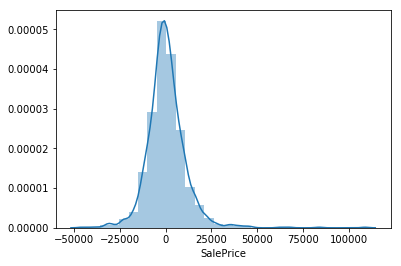

In [489]:
#fig,ax1=plt.subplot(1,1)
sns.distplot(a,bins=30)


In [462]:
best_score['new']=y_predict

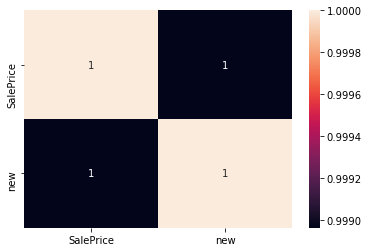

In [463]:
sns.heatmap(best_score[['SalePrice','new']].corr(),annot=True)